# Investigating Fandango Movie Ratings

In October 2015, Walt Hickey from FiveThirtyEight published a [popular article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he presented strong evidence which suggests that Fandango's movie rating system was biased and dishonest. In this project, I analyze more recent movie ratings data to and compare it to the 2015 data to determine whether there has been any change in Fandango's rating system after Hickey's analysis. 

The notebook is based on a guided project from Dataquest, an online Data Science bootcamp. The learning goal of the project was to test statistical sampling, variables, scales of measurement, and frequency distributions.

## Understanding the Data
Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). I'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.
Dataquest collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and I'll use it to analyze the rating system's characteristics after Hickey's analysis.


In [93]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [94]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Below I'll isolate the columns that offer information about Fandango's ratings in separate variables so I have just the data I'm interested in more readily available for later use

In [95]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [96]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


## Is the Sample Representative of the Population?
My goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. Therefore, I need to make sure the data I have is representative of the population of interest: all the movie ratings stored on Fandango's website. I need to make sure that the samples are representative, otherwise I should expect a large sampling error and, ultimately, wrong conclusions

From Hickey's article and from the README.md of the data set's repository, he used the following sampling criteria:
- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample. It's questionable whether this sample is representative of the entire population I'm interested in describing. It seems likely that this sample is not representative of the population, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for the more recent sample were (as it can be read in the README.md of the data set's repository):
- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for me.

## Changing the Goal
At this point, I can either collect new data or change the goal of my analysis. I'll choose the latter and place some limitations on my initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, my new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for my initial goal.

## Isolating the Samples
With this new research goal, I have two populations of interest:
- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

I'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in the more recent sample is movie popularity, the sample doesn't provide information about the number of fan ratings.

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings myself on Fandango's website. Ideally, at least 8 out of the 10 movies will have 30 fan ratings or more.

In [97]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of June 2020, it appears Fandango no longer uses Fan Reviews and instead uses reviews from Rotten Tomatoes, who they acquired in 2016

The Dataquest team compared the above ratings in April 2018 and found the following results:

Movie| Fan ratings
--- |---
Mechanic: Resurrection|2247
Warcraft	|	7271
Max Steel	|	493
Me Before You|		5263
Fantastic Beasts and Where to Find Them	|	13400
Cell	|	17
Grnius	|	127
Sully	|	11877
A Hologram for the King	|	500
Captitan America: Civil War		|35057

Just one film does not meet the 30 review requirement for popularity. This is good enough and I'll move forward. 

I'll also double-check the other data set for popular movies. The documentation states that there are only movies with at least 30 fan ratings, but it should take only a couple of seconds to double-check here.

In [98]:
sum(fandango_previous['Fandango_votes'] < 30)

0

For my purposes, I'll need to isolate only the movies released in 2015 and 2016.

I'll start with Hickey's data set and isolate only the movies released in 2015. I'll need to extract the release date from the strings in the FILM column.

In [99]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [100]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [101]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [102]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now I'll isolate the movies in the other data set.

In [103]:
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [104]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [105]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

Again, the new goal is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about it is to analyze and compare the distributions of movie ratings for the two samples.

I'll start with comparing the shape of the two distributions using kernel density plots.

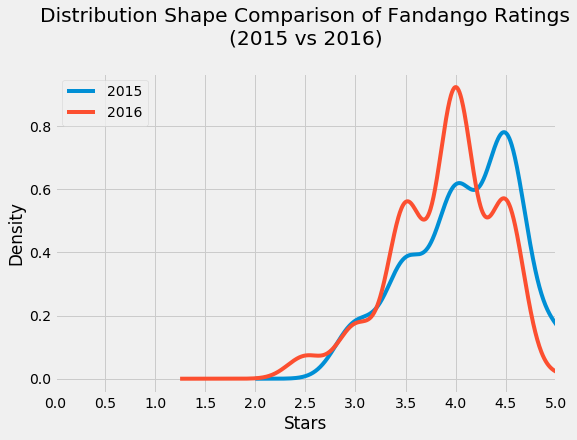

In [106]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Distribution Shape Comparison of Fandango Ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

Kernel density plot takeaways:
- Both distributions are strongly left skewed.
- The 2016 distribution is ever so slightly less left skewed than the 2015 distribution.

The slight left shift of the 2016 distribution is interesting. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference  between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. The ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies
Now I'll get more granular information. I'll examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, I normalize the tables and show percentages instead.

In [107]:
print('2015' + '\n' + '-' * 16) 
percen2015 = fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100
percen2015

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [108]:
print('2016' + '\n' + '-' * 16)
percen2016 = fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100
percen2016

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

[Text(0, 0.5, '')]

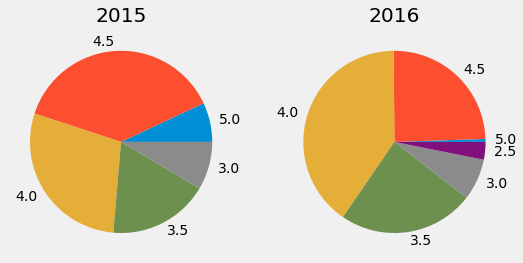

In [109]:
fig, axes = plt.subplots(1,2,figsize=(8,16))
percen2015.sort_index(ascending=False).plot.pie(ax=axes[0])
percen2016.sort_index(ascending=False).plot.pie(ax=axes[1])
axes[0].set_title('2015')
axes[1].set_title('2016')
axes[0].set(ylabel='')
axes[1].set(ylabel='')


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determining the Direction of the Change
Let's take a couple of summary metrics to get a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [110]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


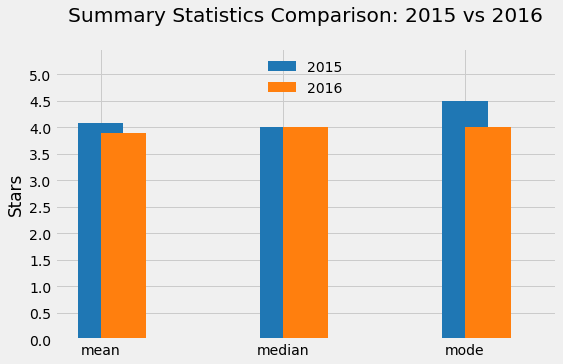

In [111]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'tab:blue', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'tab:orange', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Summary Statistics Comparison: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [112]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015, see above code block. 

The mode is also lower in 2016 by 0.5. The change in mean and mode confirm the direction of change on the kernel density plot. On average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion
My analysis shows that there is a slight difference between Fandango's ratings for popular movies in 2015 and  2016. On average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

The kernal density comparison plot also shows a slight left shift of the 2016 distribution compared to the 2015 distribtuiion indicating that ratings were slightly lower in 2016 compared to 2015. While the median is the same for both distributions, The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015, see above code block. The mode is also lower in 2016 by 0.5.

I cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.